In [ ]:
# !kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess
# !kaggle datasets download -d ejlok1/cremad

In [ ]:
# !kaggle datasets download -d ejlok1/surrey-audiovisual-expressed-emotion-savee
# !kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio

In [1]:
import pandas as pd
import torch
import numpy as np
import torchaudio
import requests
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd  # To play sound in the notebook
import os


SAVEE = '/Users/devpatelio/Downloads/Coding/Python/pyTorch/audio_mood/ALL'
RAV =  '/Users/devpatelio/Downloads/Coding/Python/pyTorch/audio_mood/ravdess-emotional-speech-audio/audio_speech_actors_01-24'
TESS = '/Users/devpatelio/Downloads/Coding/Python/pyTorch/audio_mood/TESS Toronto emotional speech set data'
CREMA = '/Users/devpatelio/Downloads/Coding/Python/pyTorch/audio_mood/AudioWAV'


/Users/devpatelio/miniconda3/lib/python3.8/site-packages/torchaudio/backend/utils.py:53: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  warnings.warn(


In [2]:
dirlist_SAVEE = os.listdir(SAVEE)
emotion_SAVEE = []
path_SAVEE = []

def PrintThree(filename):
    return filename[-8:-6]


for i in dirlist_SAVEE:
    if PrintThree(i)=='_a':
        emotion_SAVEE.append('male_angry')
    elif PrintThree(i)=='_d':
        emotion_SAVEE.append('male_disgust')
    elif PrintThree(i)=='_f':
        emotion_SAVEE.append('male_fear')
    elif PrintThree(i)=='_h':
        emotion_SAVEE.append('male_happy')
    elif PrintThree(i)=='sa':
        emotion_SAVEE.append('male_sad')
    elif PrintThree(i)=='su':
        emotion_SAVEE.append('male_surprise')
    elif PrintThree(i)=='_n':
        emotion_SAVEE.append('male_neutral') 
    path_SAVEE.append(SAVEE + '/' + i)

SAVEE_df = pd.DataFrame(emotion_SAVEE, columns=['labels'])
SAVEE_df['source'] = 'SAVEE'
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path_SAVEE, columns=['path'])], axis=1)
SAVEE_df.labels.value_counts()

male_neutral     120
male_fear         60
male_angry        60
male_sad          60
male_happy        60
male_surprise     60
male_disgust      60
Name: labels, dtype: int64

In [3]:
dirlist_RAV = os.listdir(RAV)
actor_range = list(range(1, 25))
# for i in actor_range:
#     actor_range[i] = str(i+1)

# for i in actor_range[0:9]:
#     actor_range[i] = str(i+1).zfill(2)
# actor_range[0] = str(actor_range[0]).zfill(2)
# str_actor_range = [str(item) for item in actor_range]
# print(str_actor_range)

gender_RAV = []
emotion_RAV = []
path_RAV = []

for subdir in dirlist_RAV:
    for file in os.listdir(RAV + '/' + subdir):
        if str(file[6:8]) == '01':
            if int(file[18:20])%2==0:
                temp = 'female'
            else: 
                temp = 'male'
            gender_RAV.append(temp)
            emotion_RAV.append(temp+'_neutral')
        elif str(file[6:8]) == '02':
            if int(file[18:20])%2==0:
                temp = 'female'
            else: 
                temp = 'male'
            gender_RAV.append(temp)
            emotion_RAV.append(temp+'_calm')
        elif str(file[6:8]) == '03':
            if int(file[18:20])%2==0:
                temp = 'female'
            else: 
                temp = 'male'
            gender_RAV.append(temp)
            emotion_RAV.append(temp+'_happy')
        elif str(file[6:8]) == '04':
            if int(file[18:20])%2==0:
                temp = 'female'
            else: 
                temp = 'male'
            gender_RAV.append(temp)
            emotion_RAV.append(temp+'_sad')
        elif str(file[6:8]) == '05':
            if int(file[18:20])%2==0:
                temp = 'female'
            else: 
                temp = 'male'
            gender_RAV.append(temp)
            emotion_RAV.append(temp+'_angry')
        elif str(file[6:8]) == '06':
            if int(file[18:20])%2==0:
                temp = 'female'
            else: 
                temp = 'male'
            gender_RAV.append(temp)
            emotion_RAV.append(temp+'_fearful')
        elif str(file[6:8]) == '07':
            if int(file[18:20])%2==0:
                temp = 'female'
            else: 
                temp = 'male'
            gender_RAV.append(temp)
            emotion_RAV.append(temp+'_disgust')
        elif str(file[6:8]) == '08':
            if int(file[18:20])%2==0:
                temp = 'female'
            else: 
                temp = 'male'
            gender_RAV.append(temp)
            emotion_RAV.append(temp+'_surprised')
        path_RAV.append(RAV + '/' + subdir + '/' + file)
        

RAV_df = pd.DataFrame(emotion_RAV, columns=['labels'])
RAV_df['source'] = 'RAVDESS'
RAV_df = pd.concat([RAV_df, pd.DataFrame(path_RAV, columns=['path'])], axis=1)
RAV_df.labels.value_counts()


female_disgust      96
male_surprised      96
male_happy          96
male_disgust        96
female_sad          96
male_calm           96
male_angry          96
female_fearful      96
female_calm         96
female_angry        96
female_surprised    96
male_sad            96
male_fearful        96
female_happy        96
female_neutral      48
male_neutral        48
Name: labels, dtype: int64

In [4]:
dirlist_TESS = os.listdir(TESS)
dirlist_TESS.sort()
dirlist_TESS

path_TESS = []
emotion_TESS = []

for i in dirlist_TESS:
    for file in os.listdir(TESS + '/' + i):
        if i == 'OAF_angry' or i=='YAF_angry':
            emotion_TESS.append('female_angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion_TESS.append('female_disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion_TESS.append('female_fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion_TESS.append('female_happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion_TESS.append('female_neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion_TESS.append('female_surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion_TESS.append('female_sad')
        else:
            emotion_TESS.append('Unknown')
        path_TESS.append(TESS + '/' + i + '/' + file)

TESS_df = pd.DataFrame(emotion_TESS, columns=['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df, pd.DataFrame(path_TESS, columns=['path'])], axis=1)
TESS_df.labels.value_counts()


female_neutral     400
female_disgust     400
female_surprise    400
female_happy       400
female_sad         400
female_fear        400
female_angry       400
Name: labels, dtype: int64

In [5]:
dirlist_CREMA = os.listdir(CREMA)
dirlist_CREMA.sort()

gender_CREMA = []
emotion_CREMA = []
path_CREMA = []
female_CREMA = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

for i in dirlist_CREMA:
    if int(i[0:4]) in female_CREMA:
        temp = 'female'
    else: 
        temp = 'male'
    gender_CREMA.append(temp)
    
    if i[9:12] == 'SAD' and temp == 'male':
        emotion_CREMA.append('male_sad')
    elif i[9:12] == 'SAD' and temp == 'female':
        emotion_CREMA.append('female_sad')
    elif i[9:12] == 'ANG' and temp == 'female':
        emotion_CREMA.append('female_angry')
    elif i[9:12] == 'ANG' and temp == 'male':
        emotion_CREMA.append('male_angry')
    elif i[9:12] == 'DIS' and temp == 'male':
        emotion_CREMA.append('male_disgust')
    elif i[9:12] == 'DIS' and temp == 'female':
        emotion_CREMA.append('female_disgust')
    elif i[9:12] == 'FEA' and temp == 'female':
        emotion_CREMA.append('female_fear')
    elif i[9:12] == 'FEA' and temp == 'male':
        emotion_CREMA.append('male_fear')
    elif i[9:12] == 'HAP' and temp == 'female':
        emotion_CREMA.append('female_happy')
    elif i[9:12] == 'HAP' and temp == 'male':
        emotion_CREMA.append('male_happy')
    elif i[9:12] == 'NEU' and temp == 'female':
        emotion_CREMA.append('female_neutral')
    elif i[9:12] == 'NEU' and temp == 'male':
        emotion_CREMA.append('male_neutral')
    path_CREMA.append(CREMA + '/' + i)
    
CREMA_df = pd.DataFrame(emotion_CREMA, columns=['labels'])
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df, pd.DataFrame(path_CREMA, columns=['path'])], axis=1)
CREMA_df.labels.value_counts()

male_fear         671
male_disgust      671
male_angry        671
male_happy        671
male_sad          671
female_angry      600
female_disgust    600
female_happy      600
female_sad        600
female_fear       600
male_neutral      575
female_neutral    512
Name: labels, dtype: int64

In [6]:
dataset = pd.concat([SAVEE_df, RAV_df, TESS_df, CREMA_df], axis=0)
print(dataset.labels.value_counts())
dataset.to_csv("audio_stuff.csv", index=False)

dataset.iloc[1]

female_angry        1096
female_disgust      1096
female_happy        1096
female_sad          1096
female_fear         1000
female_neutral       960
male_sad             827
male_angry           827
male_happy           827
male_disgust         827
male_neutral         743
male_fear            731
female_surprise      400
male_calm             96
female_surprised      96
female_fearful        96
male_fearful          96
male_surprised        96
female_calm           96
male_surprise         60
Name: labels, dtype: int64


labels                                             male_sad
source                                                SAVEE
path      /Users/devpatelio/Downloads/Coding/Python/pyTo...
Name: 1, dtype: object

male_sad
(75046,)
(20, 147)
female_sad
(82403,)
(20, 161)


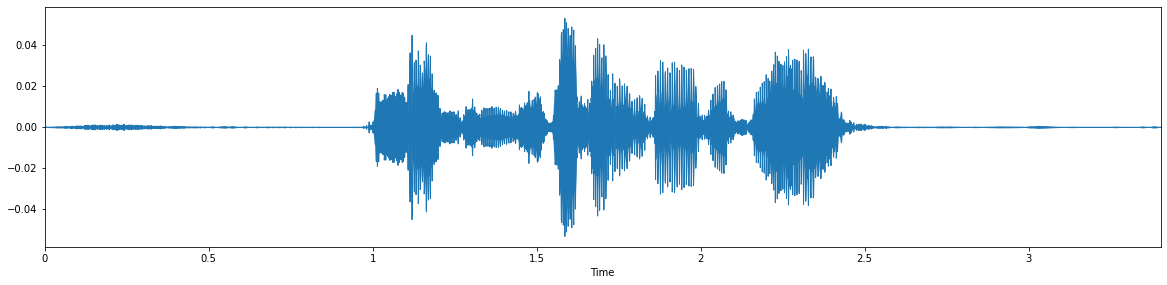

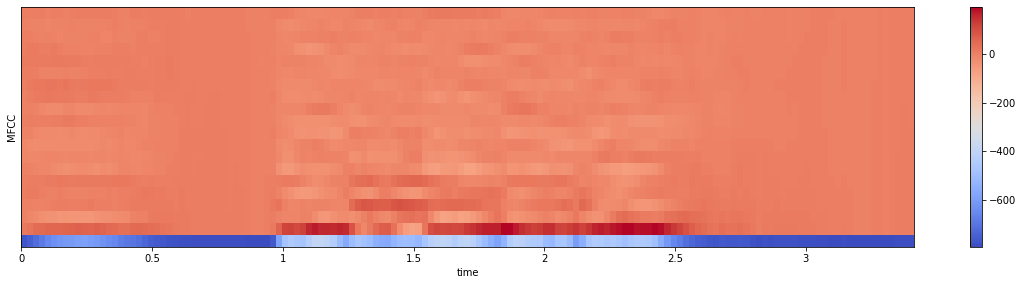

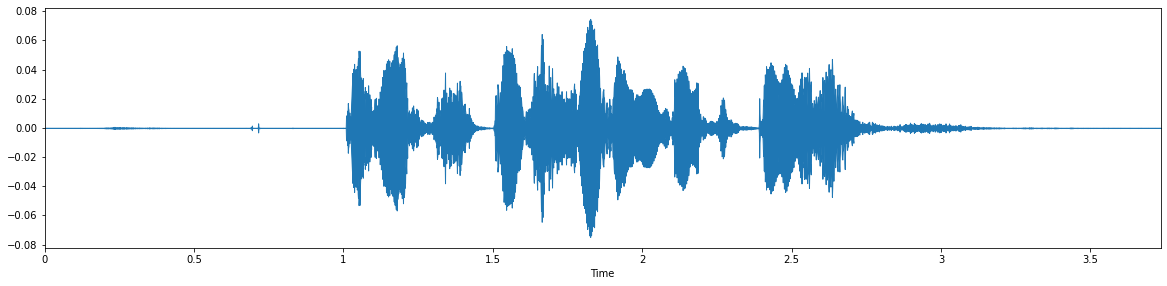

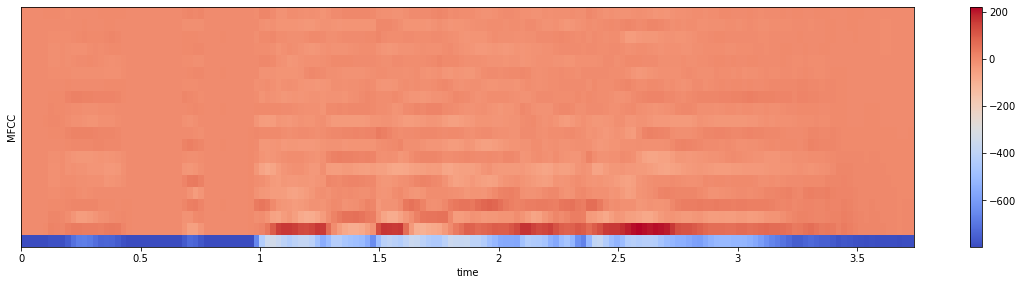

In [7]:
filename = dataset.iloc[796]['path']
wf, sr = librosa.load(filename, res_type='kaiser_fast')
mfcc = librosa.feature.mfcc(y=wf, sr=sr)

plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(wf, sr=sr)

plt.figure(figsize=(20, 15))
plt.subplot(3, 1, 1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.xlabel('time')
plt.colorbar()
print(dataset.iloc[796]['labels'])


ipd.Audio(filename)
print(wf.shape)
print(mfcc.shape)



filename = dataset.iloc[486]['path']
wf, sr = librosa.load(filename, res_type='kaiser_fast')
mfcc = librosa.feature.mfcc(y=wf, sr=sr)

plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(wf, sr=sr)

plt.figure(figsize=(20, 15))
plt.subplot(3, 1, 1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.xlabel('time')
plt.colorbar()
print(dataset.iloc[486]['labels'])

print(wf.shape)
print(mfcc.shape)

In [8]:
mfcc_list = list()

for filename in dataset['path']:
    wf, sr = librosa.load(filename, res_type='kaiser_fast')
    mfcc = librosa.feature.mfcc(y=wf, sr=sr)
    mfcc_list.append(mfcc)
#     for i in mfcc:
#         empty_mean_mfcc.append(np.array(np.mean(i)))
        


In [36]:
mfcc_list[0][0]

array([-470.6492  , -469.76654 , -467.8643  , -469.6876  , -473.10043 ,
       -478.27783 , -477.29285 , -476.92743 , -482.61682 , -489.83795 ,
       -493.37125 , -496.34277 , -500.04895 , -501.34998 , -502.9581  ,
       -504.05664 , -506.61118 , -504.79715 , -502.81427 , -503.35178 ,
       -503.75677 , -489.76785 , -423.53873 , -368.6414  , -317.74023 ,
       -250.93797 , -184.87946 , -175.14363 , -182.31223 , -190.2674  ,
       -215.52113 , -209.21176 , -195.42654 , -160.80328 , -106.403015,
        -86.65125 ,  -99.18806 , -133.6018  , -217.89795 , -292.42093 ,
       -282.4388  , -277.19342 , -232.59329 , -182.78438 , -170.29846 ,
       -189.3544  , -257.01984 , -409.7839  , -467.7701  , -336.384   ,
       -195.12645 , -161.56271 , -180.80157 , -188.28351 , -203.42435 ,
       -191.86687 , -203.24098 , -259.59122 , -348.07715 , -418.3559  ,
       -423.40616 , -328.03604 , -285.9926  , -307.19678 , -356.0165  ,
       -385.50912 , -399.91153 , -373.33957 , -249.57065 , -205.

In [159]:
mean_list = list()
for i in mfcc_list:
    mean_item = list()
    for x in i: 
        mean_item.append(np.mean(x))
    mean_list.append(mean_item)

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from torch import optim as optim, functional as F
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt


for counter, i in enumerate(mean_list):
    for count, x in enumerate(i):
        mean = np.mean(i, axis=0)
        std = np.std(i, axis=0)
        x = (x - mean)/std
        mean_list[counter][count] = x
    

In [160]:
dataset['mfcc'] = mean_list
dataset.head()

,labels,source,path,mfcc
0,male_sad,SAVEE,/Users/devpatelio/Downloads/Coding/Python/pyTo...,"[-4.114038, 3.7823222, 1.1287005, 4.0110393, -..."
1,male_sad,SAVEE,/Users/devpatelio/Downloads/Coding/Python/pyTo...,"[-4.1411643, 3.8706841, 1.5510163, 3.9606035, ..."
2,male_neutral,SAVEE,/Users/devpatelio/Downloads/Coding/Python/pyTo...,"[-4.167561, 4.1050615, 2.2902808, 2.985493, 2...."
3,male_surprise,SAVEE,/Users/devpatelio/Downloads/Coding/Python/pyTo...,"[-4.1753445, 3.8015928, 1.3041954, 3.1588714, ..."
4,male_neutral,SAVEE,/Users/devpatelio/Downloads/Coding/Python/pyTo...,"[-4.122096, 4.0821314, 1.4939915, 2.7916214, 3..."


In [162]:
dataset.to_csv('processed_dataset.csv', index=0)

In [163]:
labels = []


In [164]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from torch import optim as optim, functional as F
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

transforms = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

label_column = dataset['labels']
labels = (label_column.unique())
one_hot_template = torch.zeros(len(labels), len(labels))

for i in range(0, len(labels)):
    one_hot_template[i][i] = 1

label_encoder_dict = {labels[i]: one_hot_template[i] for i in range(0, len(labels))}
dataset_np = np.array(dataset['mfcc'])
labels_np = np.array(dataset['labels'])


        

combined = []
for counter, x in enumerate(labels_np):
    x = label_encoder_dict[str(x)]
    combined.append(  [dataset_np[counter], x]  )

In [165]:

for counter, i in enumerate(combined):
    combined[counter][0] = torch.FloatTensor(combined[counter][0])

In [166]:
import matplotlib.pyplot as plt

categories = labels
count = []

for i in categories:
    count.append(dataset.loc[dataset['labels'] == i, 'labels'].count())

<BarContainer object of 20 artists>

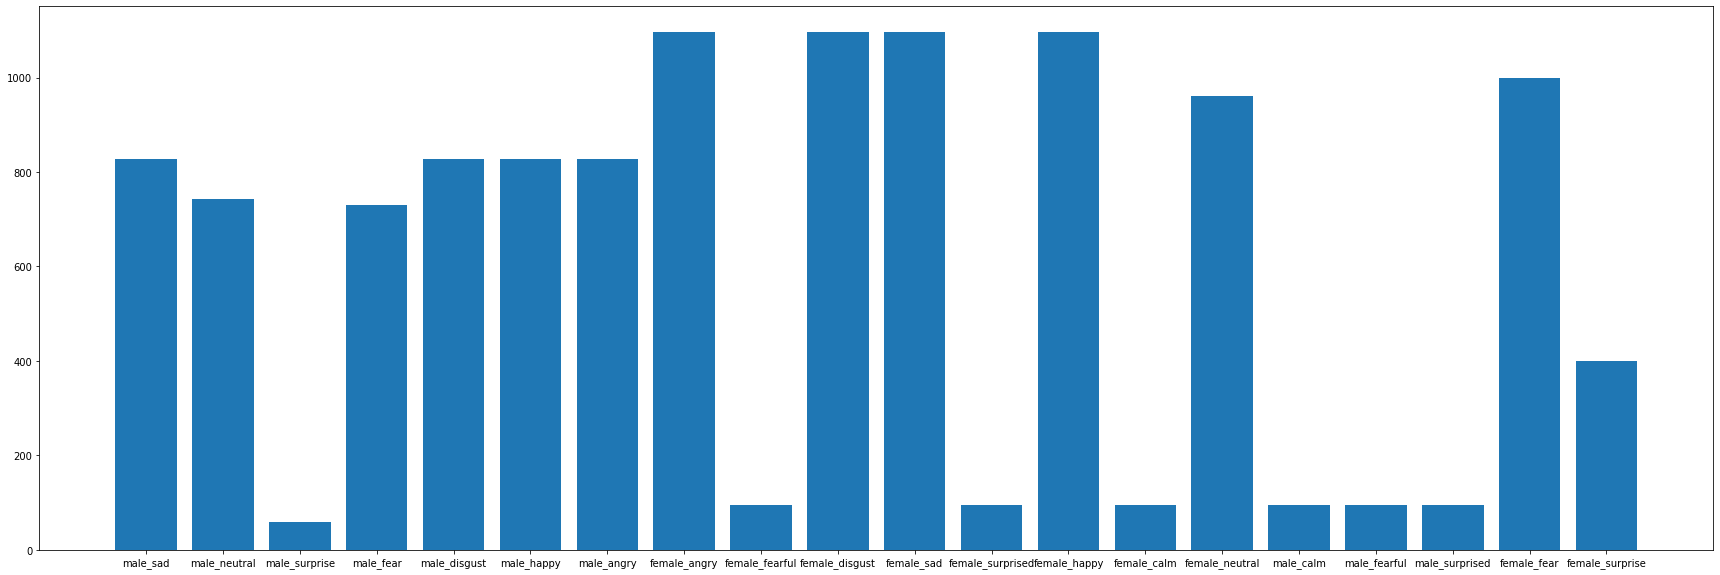

In [167]:
plt.figure(figsize=(30, 10))
plt.bar(categories, count)

In [168]:
np.random.shuffle(combined)
train_index = int(len(combined)*0.8)
train_set_np = combined[:train_index]
test_set_np = combined[train_index:-1]

from torchvision import datasets, transforms
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset, TensorDataset
from torch.optim import *
import torchvision
import torchvision.transforms as transforms

trainloader = torch.utils.data.DataLoader(train_set_np, shuffle=False, batch_size = 20)
testloader = torch.utils.data.DataLoader(test_set_np, shuffle=False, batch_size = 20)

train = iter(trainloader)
mfcc_data, label = next(train)


In [170]:
print(mfcc_data[1])

tensor([-4.0772,  3.9002, -0.4567,  3.6741, -1.7286,  3.0332, -1.5676,  1.3398,
        -0.6096, -0.3958,  1.3196, -2.7677,  2.0697, -2.6575,  0.9647, -1.2670,
         0.0484,  0.2266, -2.6358,  0.6633])


In [201]:
class Net(nn.Module):
    def __init__ (self):
        super(Net, self).__init__() 
        self.fc1 = nn.Linear(20, 300)
        self.fc2 = nn.Linear(300, 700)
        self.fc3 = nn.Linear(700, 500)
        self.fc4 = nn.Linear(500, 200)
        self.fc5 = nn.Linear(200, 100)
        self.output = nn.Linear(100, 20)
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.output(x)
        x = self.softmax(x)
        return x
net = Net()   

In [213]:
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
criterion = nn.MSELoss()

epochs = 50
for epoch in range(0, epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        labels = labels.type(torch.FloatTensor)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
    print(f"Epoch: {epoch} Training loss: {running_loss/1}")  


print('Finished Training')


Epoch: 0 Training loss: 3.6784493160812417
Epoch: 1 Training loss: 3.6322687813080847
Epoch: 2 Training loss: 3.588265367601707
Epoch: 3 Training loss: 3.5475678005750524
Epoch: 4 Training loss: 3.5060635565168923
Epoch: 5 Training loss: 3.46740484664042
Epoch: 6 Training loss: 3.4269792705890723
Epoch: 7 Training loss: 3.3886171571721206
Epoch: 8 Training loss: 3.3512789915694157
Epoch: 9 Training loss: 3.317128048882296
Epoch: 10 Training loss: 3.2789640613154916
Epoch: 11 Training loss: 3.2441964685858693
Epoch: 12 Training loss: 3.2115671977444435
Epoch: 13 Training loss: 3.178931108006509
Epoch: 14 Training loss: 3.149249134465208
Epoch: 15 Training loss: 3.1193462093579
Epoch: 16 Training loss: 3.088449046801543
Epoch: 17 Training loss: 3.0564801299769897
Epoch: 18 Training loss: 3.0277212741166295
Epoch: 19 Training loss: 2.99670975294066
Epoch: 20 Training loss: 2.97028433045125
Epoch: 21 Training loss: 2.9402579480811255
Epoch: 22 Training loss: 2.9183152941022854
Epoch: 23 Tr

In [215]:
correct_count, all_count = 0, 0
output_probabilities = []

for i, data in enumerate(testloader, 0):
    inputs, labels = iter(data)
    with torch.no_grad():
        probs = net(inputs.float())
    ps = torch.exp(probs)
    ps = ps.tolist()
    labels = labels.tolist()
    output_probabilities.append(ps)
    m_pred = max(ps)
    m_true = max(labels)
    if (ps.index(m_pred) == labels.index(m_true)):
        correct_count += 1
    all_count += 1
    
print(correct_count/all_count * 100, '%')

32.78688524590164 %


3